In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import colorcet as cc
plt.style.use('fivethirtyeight')

## 01 Hitters Data

In [59]:
hitters = pd.read_csv('data/Hitters.csv')

In [60]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [61]:
hitters['Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 322 entries, 0 to 321
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
263 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [62]:
hitters['Salary'].count(), hitters['Salary'].notnull().sum()

(263, 263)

In [63]:
hitters = hitters.dropna(subset=['Salary'])

In [64]:
hitters['Salary'].info()

<class 'pandas.core.series.Series'>
Index: 263 entries, 1 to 321
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
263 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [65]:
hits, years, salary = hitters[['Hits', 'Years', 'Salary']].to_numpy().T
# salary = np.log(salary)

In [66]:
hits.shape, years.shape, salary.shape

((263,), (263,), (263,))

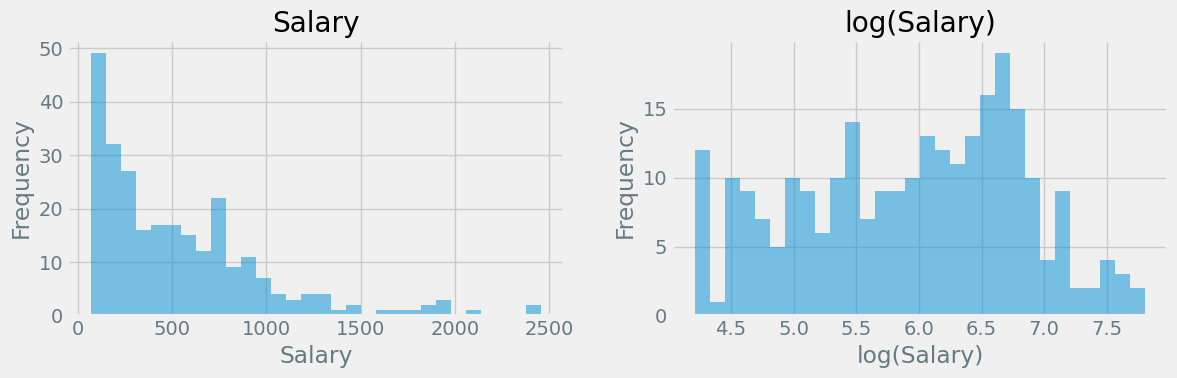

In [67]:
# Let's plot histogram of salary to see the distribution: first original values and then its log-transformed version
# Let's use 30 bins for both histograms, color the original histogram with default blue color and the log-transformed 
# histogram with default green color. Set alpha=0.5 for both histograms. Add titles and labels to the axes.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(salary, bins=30, alpha=0.5)
ax[0].set_title('Salary')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)
ax[1].hist(np.log(salary), bins=30, alpha=0.5)
ax[1].set_title('log(Salary)')
ax[1].set_xlabel('log(Salary)')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
plt.tight_layout()

## 02 `plt.scatter()`

### 02- Using salary as a *color* of points

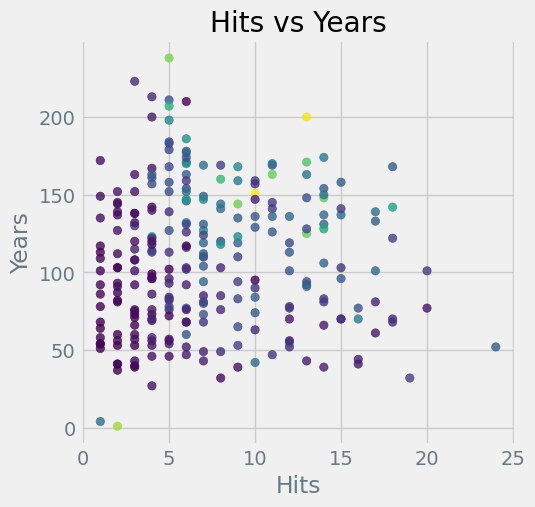

In [68]:
# Let's plot the scatter plot of hits and years using salary as the COLOR of the points.
# We will use the 'viridis' colormap and 'subplots' to create the plot.
fig, ax = plt.subplots(figsize=(5, 5))
sc = ax.scatter(years, hits, c=salary, cmap='viridis', alpha=0.8)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')
ax.grid(True);

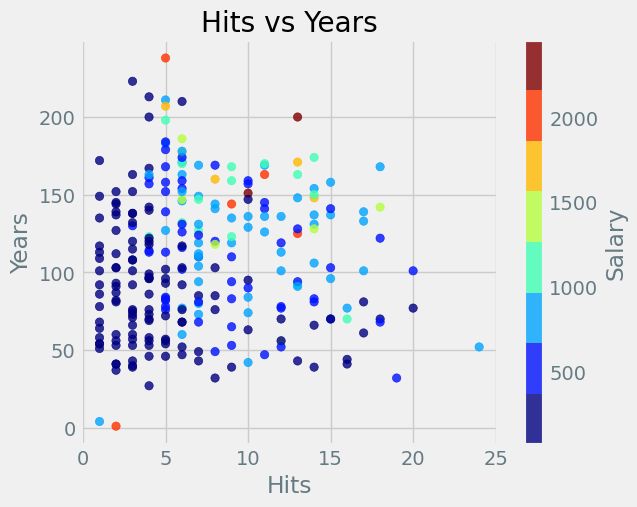

In [69]:
# Let's plot the scatter plot of hits and years using salary as the COLOR of the points.
# We will use the 'viridis' colormap and 'subplots' to create the plot.
fig, ax = plt.subplots(figsize=(6, 5))
# cmap = cc.cm.rainbow4
sc = ax.scatter(years, hits, c=salary, cmap=plt.get_cmap('jet', 8), alpha=0.8)
ax.set_xlabel('Hits')
ax.set_ylabel('Years')
ax.set_title('Hits vs Years')
# Let's add a colorbar to the plot
fig.colorbar(sc, label='Salary')
ax.grid(True);

### 03 Colormaps

There are three main types of colormaps in Matplotlib: sequential, diverging, and qualitative. The choice of colormap depends on the nature of your data and the message you want to convey in your visualization.

#### Sequential Colormaps

Sequential colormaps are designed for representing ordered, quantitative data that varies from low to high values. They typically progress from light to dark shades of a single color or a range of related colors. Examples include `viridis`, `inferno`, `plasma`, and `magma`.

Sequential colormaps are best used when:
- Representing continuous data with a clear ordering, such as temperature, elevation, or concentration.
- Highlighting differences in magnitude or intensity.
- Providing a clear visual hierarchy from low to high values.

#### Diverging Colormaps

Diverging colormaps are suitable for representing data that varies around a central value, typically a neutral or midpoint. They use two different colors (or shades) that diverge from the midpoint, often used to highlight positive and negative deviations. Examples include `RdBu`, `PiYG`, and `BrBG`.

Diverging colormaps are best used when:
- Representing data with a meaningful midpoint or neutral value.
- Highlighting positive and negative deviations from the midpoint.
- Comparing values above and below a reference point.

#### Qualitative Colormaps

Qualitative colormaps are used for categorical data, where the colors are chosen to be distinct and easily distinguishable. They do not imply any ordering or magnitude. Examples include `Set1`, `Accent`, and `Dark2`.

Qualitative colormaps are best used when:
- Representing categorical or nominal data without any inherent ordering.
- Distinguishing between different groups or classes.
- Providing a clear visual separation between categories.

#### Choosing the Right Colormap for Quantitative Data

For quantitative data, sequential colormaps are generally preferred over diverging colormaps. Sequential colormaps effectively convey the magnitude and ordering of values, making them suitable for representing continuous data.

When using sequential colormaps with quantitative data, consider the following guidelines:
- Choose a colormap that provides a clear visual distinction between low and high values.
- Ensure that the colormap is perceptually uniform, meaning that equal steps in the data correspond to equal perceptual differences in color.
- Avoid using colormaps with abrupt changes or discontinuities, as they can distort the perception of the data.

Some popular sequential colormaps for quantitative data include `viridis`, `inferno`, and `plasma`. These colormaps are designed to be perceptually uniform, colorblind-friendly, and visually appealing.

In summary, the choice of colormap depends on the nature of your data and the message you want to convey. Sequential colormaps are generally preferred for quantitative data, diverging colormaps are suitable for data with a meaningful midpoint, and qualitative colormaps are used for categorical data.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/20658974/595eb11b-8ff3-4d5f-8901-9ddfd7380eec/Ch8_Tree_Based_Methods-dragged.pdf

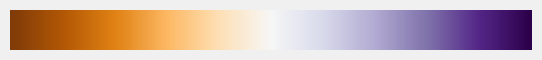

In [70]:
utils.show_cmap('PuOr')

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']